In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab            # The functions in this package can add the fitting curve of the random variable distribution
import numpy as np
from functions import *
from sklearn import decomposition
from sklearn import preprocessing

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import statsmodels.formula.api as smf
import statsmodels.api as sm

# Importation de la fonction function.py

In [2]:
data = pd.read_csv("notes.csv", sep=",")
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


In [3]:
data.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

# Détectons les outliers via z_score ou par l'écart-interquartile

# Détections des outliers via z_score

**Technique** de détection des outliers par Z-score

i : variable sélectionnée
mean : moyenne de la variable
std : écart-type de la variable

Distance de la variable par rapport à la moyenne

z_score = ( i- mean) / std


In [4]:
outliers = []
def detect_outliers(data):
  # valeur limite à partir de laquelle je vais détecter les valeurs aberrantes
  threshold = 2.3
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i - mean) / std 
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers


In [5]:
list1 = detect_outliers(data['diagonal'])
list1

[172.75, 171.13, 171.04, 173.01]

In [6]:
#df_diag = pd.DataFrame({'diagonal' : detect_outliers(data['diagonal'])})
df1 = data[data['diagonal'].isin(detect_outliers(data['diagonal']))]

In [7]:
df2 = data[data['height_right'].isin(detect_outliers(data['height_right']))]
df3 = data[data['height_left'].isin(detect_outliers(data['height_left']))]
df4 = data[data['margin_up'].isin(detect_outliers(data['margin_up']))]
df5 = data[data['margin_low'].isin(detect_outliers(data['margin_low']))]
df6 = data[data['length'].isin(detect_outliers(data['length']))]
df_outliers = pd.concat([df1, df2, df3, df4, df5, df6])
df_outliers

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
34,True,172.75,104.33,103.97,4.34,3.14,113.12
39,True,171.13,104.28,103.14,4.16,2.92,113.00
70,True,171.04,103.84,103.64,4.22,3.36,112.70
166,False,173.01,104.59,104.31,5.04,3.05,110.91
0,True,171.81,104.86,104.95,4.52,2.89,112.83
39,True,171.13,104.28,103.14,4.16,2.92,113.00
112,False,172.32,104.60,104.83,4.84,3.51,112.55
122,False,172.29,104.72,104.86,5.71,3.16,112.15
0,True,171.81,104.86,104.95,4.52,2.89,112.83
49,True,171.59,103.23,103.64,4.01,2.94,113.59


# Détections des outliers via l'écart interquartile

In [8]:
df_diag1 = data.diagonal.quantile(0.25)
df_diag3 = data.diagonal.quantile(0.75)
iqr_diag = df_diag3 - df_diag1
iqr_diag

0.40749999999999886

In [9]:
lower_df_diag = df_diag1 - 1.5*iqr_diag
upper_df_diag = df_diag3 + 1.5*iqr_diag
(lower_df_diag, upper_df_diag)

(171.11874999999998, 172.74874999999997)

In [10]:
out_diag = data[(data.diagonal < lower_df_diag) | (data.diagonal > upper_df_diag)]

In [11]:
df_hl1 = data.height_left.quantile(0.25)
df_hl3 = data.height_left.quantile(0.75)
iqr_hl = df_hl3 - df_hl1
lower_df_hl = df_hl1 - 1.5*iqr_hl
upper_df_hl = df_hl3 + 1.5*iqr_hl
out_hl = data[(data.height_left < lower_df_hl) | (data.height_left > upper_df_hl)]

In [12]:
df_hr1 = data.height_right.quantile(0.25)
df_hr3 = data.height_right.quantile(0.75)
iqr_hr = df_hr3 - df_hr1
lower_df_hr = df_hr1 - 1.5*iqr_hr
upper_df_hr = df_hr3 + 1.5*iqr_hr
out_hr = data[(data.height_right < lower_df_hr) | (data.height_right > upper_df_hr)]

In [13]:
df_ml1 = data.margin_low.quantile(0.25)
df_ml3 = data.margin_low.quantile(0.75)
iqr_ml = df_ml3 - df_ml1
lower_df_ml = df_ml1 - 1.5*iqr_ml
upper_df_ml = df_ml3 + 1.5*iqr_ml
out_ml = data[(data.margin_low < lower_df_ml) | (data.margin_low > upper_df_ml)]

In [14]:
df_mu1 = data.margin_up.quantile(0.25)
df_mu3 = data.margin_up.quantile(0.75)
iqr_mu = df_mu3 - df_mu1
lower_df_mu = df_mu1 - 1.5*iqr_mu
upper_df_mu = df_mu3 + 1.5*iqr_mu
out_mu = data[(data.margin_up < lower_df_mu) | (data.margin_up > upper_df_mu)]

In [15]:
df_l1 = data.length.quantile(0.25)
df_l3 = data.length.quantile(0.75)
iqr_l = df_l3 - df_l1
lower_df_l = df_l1 - 1.5*iqr_l
upper_df_l = df_l3 + 1.5*iqr_l
out_l = data[(data.length < lower_df_l) | (data.length > upper_df_l)]

In [16]:
# le tableau des outliers
outliers_iqr = pd.concat([out_diag, out_hl, out_hr, out_ml, out_mu, out_l])
outliers_iqr

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
34,True,172.75,104.33,103.97,4.34,3.14,113.12
70,True,171.04,103.84,103.64,4.22,3.36,112.70
166,False,173.01,104.59,104.31,5.04,3.05,110.91
0,True,171.81,104.86,104.95,4.52,2.89,112.83
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [17]:
# Tableau de data sans outliers

df_l = data[(data.length > lower_df_l) & (data.length < upper_df_l)]
df_mu = data[(data.margin_up > lower_df_mu) & (data.margin_up < upper_df_mu)]
df_ml = data[(data.margin_low > lower_df_ml) & (data.margin_low < upper_df_ml)] 
df_hl = data[(data.height_left > lower_df_hl) & (data.height_left < upper_df_hl)] 
df_hr = data[(data.height_right > lower_df_hr) & (data.height_right < upper_df_hr)] 
df_diag = data[(data.diagonal > lower_df_diag) & (data.diagonal < upper_df_diag)]
df = df_diag.merge(df_mu).merge(df_ml).merge(df_hl).merge(df_hr).merge(df_l)
df


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.67,103.74,103.70,4.01,2.87,113.29
1,True,171.83,103.76,103.76,4.40,2.88,113.84
2,True,171.80,103.78,103.65,3.73,3.12,113.63
3,True,172.57,104.65,104.44,4.54,2.99,113.16
4,True,172.38,103.55,103.80,3.97,2.90,113.30
...,...,...,...,...,...,...,...
160,False,171.43,104.26,103.97,5.73,3.14,111.82
161,False,172.11,104.23,104.45,5.24,3.58,111.78
162,False,172.47,104.27,104.10,4.88,3.33,110.68
163,False,171.82,103.97,103.88,4.73,3.55,111.87


# Mission 0

# Afin d'introduire votre analyse, effectuez une brève description des données (analyses univariées et bivariées).

In [18]:
cc = df.groupby('is_genuine').count()
cc["prop"]=cc["diagonal"]/170*100
cc[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,69,69,69,69,69,69
True,96,96,96,96,96,96


<AxesSubplot:ylabel='diagonal'>

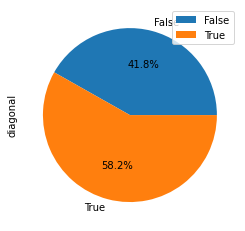

In [19]:
cc.plot.pie(y='diagonal', autopct='%1.1f%%')

In [20]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,171.934788,104.060364,103.922182,4.611515,3.177333,112.568848
std,0.283232,0.290726,0.323860,0.710143,0.227564,0.925008
min,171.130000,103.230000,103.140000,3.540000,2.560000,109.970000
25%,171.730000,103.850000,103.690000,4.050000,3.020000,111.850000
50%,171.940000,104.050000,103.950000,4.450000,3.180000,112.850000
75%,172.130000,104.280000,104.170000,5.140000,3.330000,113.290000
max,172.590000,104.720000,104.860000,6.280000,3.680000,113.980000


## Analyse bivariée

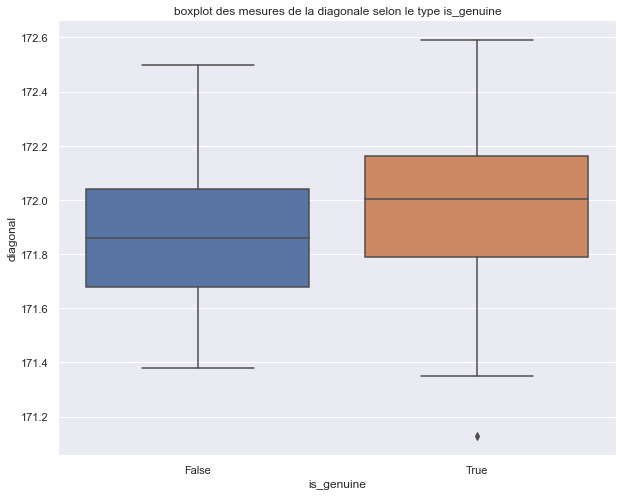

In [21]:
%matplotlib inline
sns.set(rc={"figure.figsize":(10,8)})
bp1 = sns.boxplot(x="is_genuine", y='diagonal', data=df).set_title("boxplot des mesures de la diagonale selon le type is_genuine")

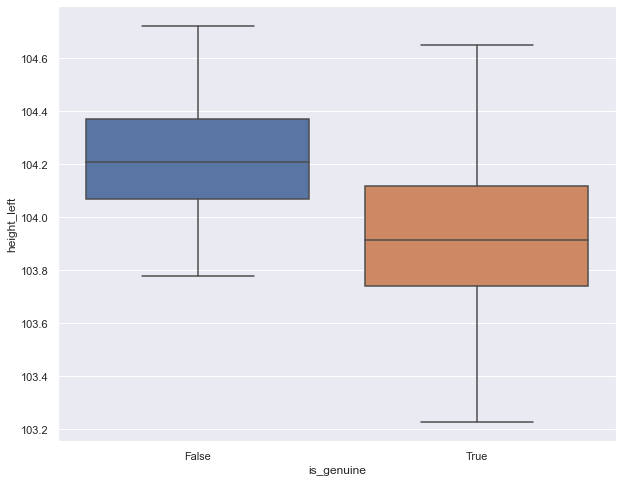

In [22]:
ybp2 = sns.boxplot(x="is_genuine", y="height_left", data=df)

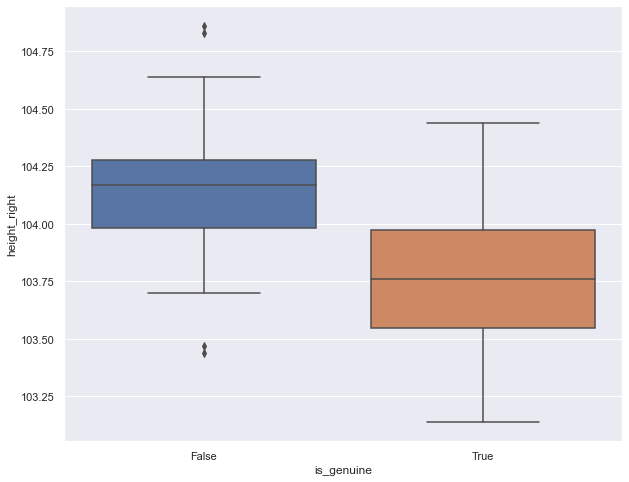

In [23]:
bp3 = sns.boxplot(x="is_genuine", y='height_right', data=df)

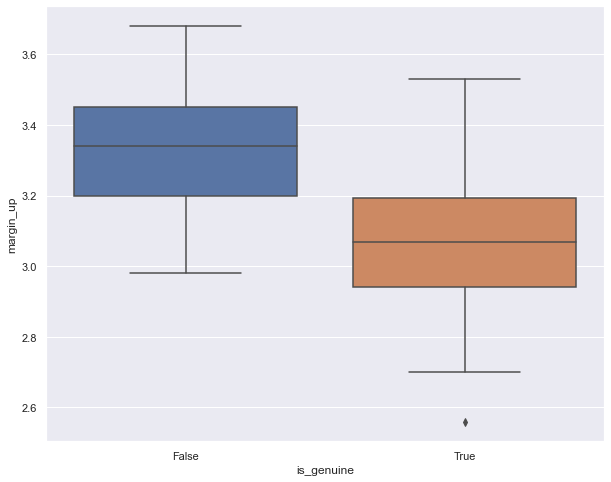

In [24]:
bp4 = sns.boxplot(x="is_genuine", y="margin_up", data=df)

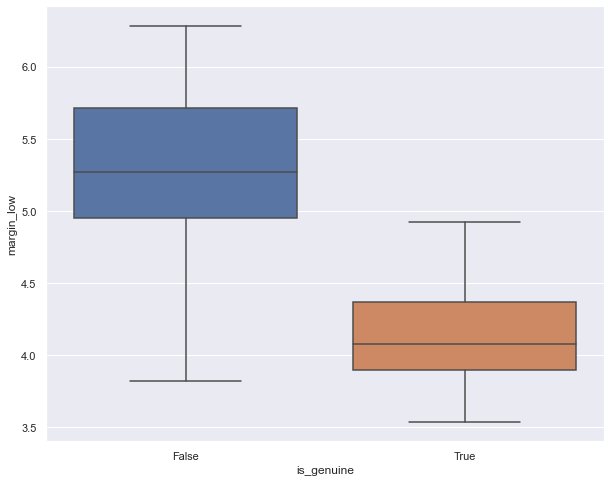

In [25]:
bp5 = sns.boxplot(x="is_genuine", y="margin_low", data=df)

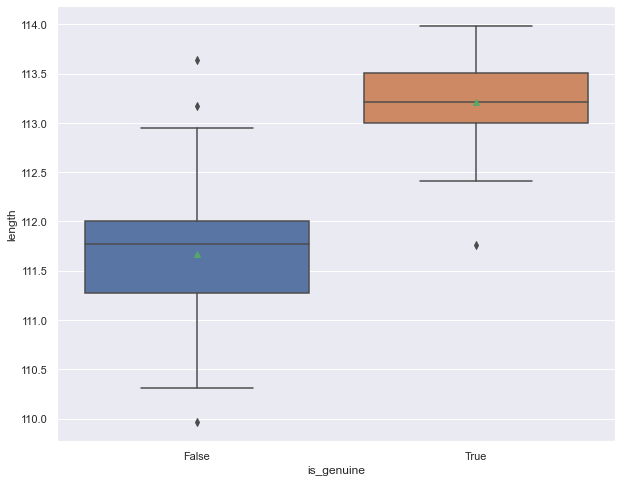

In [26]:
bp6 = sns.boxplot(x="is_genuine", y="length", data=df, showmeans=True)

Détecter les valeurs aberrantes et les recupérerer dans 1 dataframe.

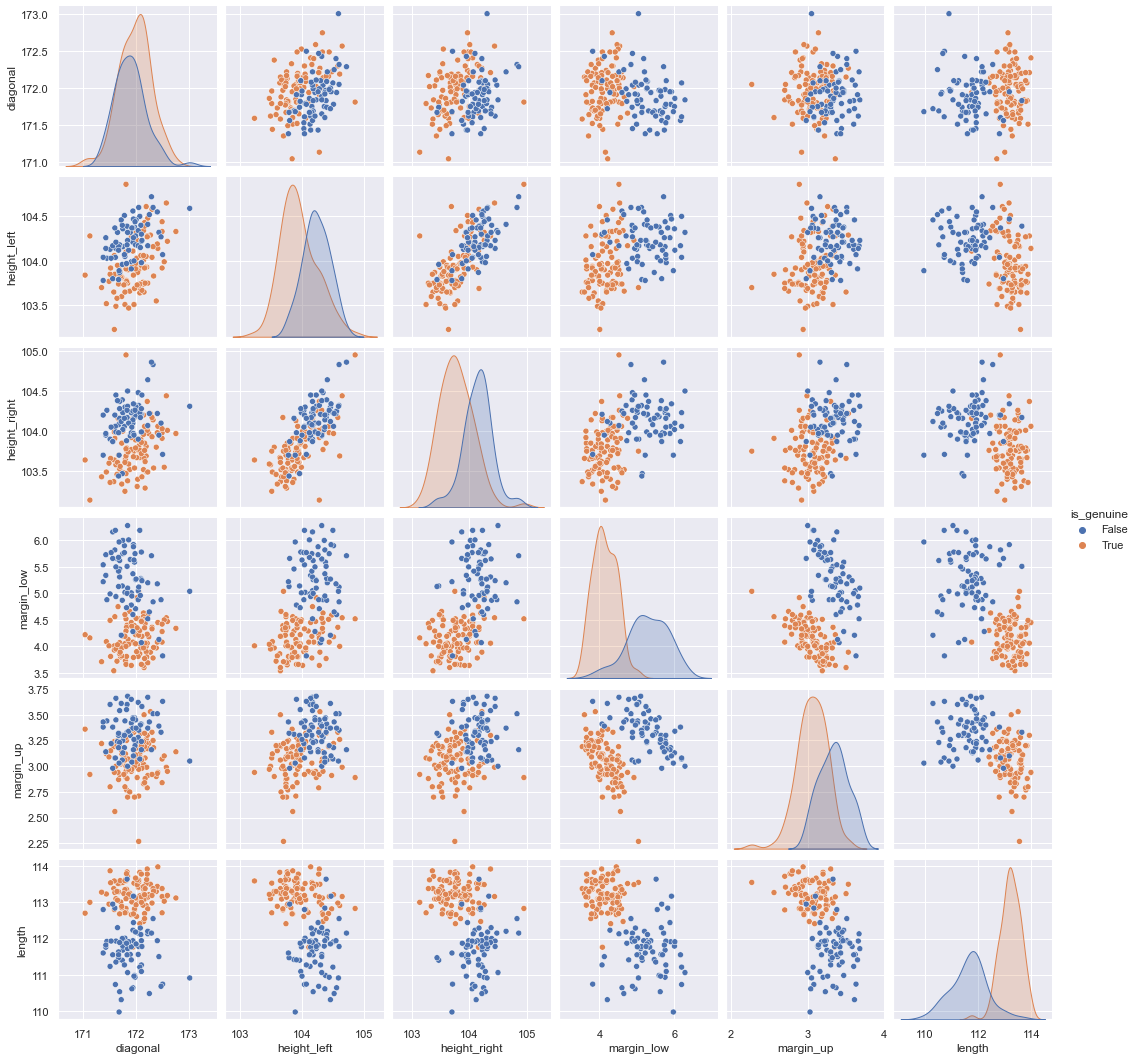

In [27]:
pairplots = sns.pairplot(data, hue="is_genuine")
pairplots

# Faisons les tests sur data

In [28]:
!pip install pingouin

In [29]:
import pingouin as pg

In [30]:
aov1 = pg.anova(data=data, dv="diagonal", between="is_genuine", ss_type=2, detailed=True, effsize="np2")
aov1

,Source,SS,DF,MS,F,p-unc,np2
0,is_genuine,0.306264,1,0.306264,3.320728,0.07019,0.019383
1,Within,15.494278,168,0.092228,NaN,NaN,NaN


p_unc > 0.05, la variable diagonal est non corrélée avec is_genuine

In [31]:
aov2 = pg.anova(data=data, dv="margin_low", between="is_genuine", ss_type=2, detailed=True, effsize="np2")
aov2

,Source,SS,DF,MS,F,p-unc,np2
0,is_genuine,53.332036,1,53.332036,298.896502,3.940145e-39,0.640177
1,Within,29.976202,168,0.178430,NaN,NaN,NaN


In [32]:
#p_unc < 0.05, la variable margin_low est corrélée avec is_genuine

In [33]:
aov3 = pg.anova(data=data, dv="margin_low", between="is_genuine", ss_type=2, detailed=False, effsize="np2")
aov3

C:\Users\dell\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,Source,ddof1,ddof2,F,p-unc,np2
0,is_genuine,1,168,298.896502,3.940145e-39,0.640177


In [34]:
aov4 = pg.anova(data=data, dv="margin_up", between="is_genuine", ss_type=2, detailed=False, effsize="np2")
aov4

,Source,ddof1,ddof2,F,p-unc,np2
0,is_genuine,1,168,86.413125,7.567386e-17,0.339657


In [35]:
aov5 = pg.anova(data=data, dv="height_left", between="is_genuine", ss_type=2, detailed=False, effsize="np2")
aov5

,Source,ddof1,ddof2,F,p-unc,np2
0,is_genuine,1,168,45.521662,2.334200e-10,0.213195


In [36]:
aov6 = pg.anova(data=data, dv="height_right", between="is_genuine", ss_type=2, detailed=False, effsize="np2")
aov6

,Source,ddof1,ddof2,F,p-unc,np2
0,is_genuine,1,168,73.35904,6.665246e-15,0.303942


In [37]:
aov7 = pg.anova(data=data, dv="length", between="is_genuine", ss_type=2, detailed=False, effsize="np2")
aov7

,Source,ddof1,ddof2,F,p-unc,np2
0,is_genuine,1,168,360.054076,1.234823e-43,0.681851


# Test de Wilcoxon-Mann-Whitney
En statistique, le test de Wilcoxon-Mann-Whitney (ou test U de Mann-Whitney ou encore test de la somme des rangs de Wilcoxon)
est un test statistique non paramétrique qui permet de tester l'hypothèse selon laquelle les médianes de chacun de 
deux groupes de données sont proches.

In [38]:
vrai = data[data["is_genuine"]==True]
faux = data[data["is_genuine"]==False]

In [39]:
#vrai.groupby(by=["diagonal"], ascending = True)

In [40]:
vrai_test = vrai[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

In [41]:
faux_test = faux[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

In [42]:
U = pg.mwu(vrai_test['diagonal'], faux_test['diagonal'])
print(U)

      U-val       tail    p-val       RBC      CLES
MWU  4232.5  two-sided  0.02045 -0.209286  0.604643


In [43]:
from scipy import stats
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(vrai_test['diagonal'], faux_test['diagonal'], use_continuity=True, alternative='two-sided')
print(p)

0.020449605742014914


## Test de Kruskal Wallis
Ce test correspond au test de Mann-Whitney pour plus de deux échantillons, on peut le considérer comme la version non paramétrique de l’Anova (modèles statistiques qui permettent de montrer si des groupes appartiennent à la même population). 

In [44]:
# H0: les différentes dimensions des variables sont similaires 

# H1: les dimensions des variables ont des valeurs différentes

#Application du test de Kruskal Wallis
stats.kruskal(vrai_test.diagonal,faux_test.diagonal)

#On obtient une pvalue < 0.05, on rejette l'hypothèse nulle

KruskalResult(statistic=5.380442522995692, pvalue=0.020363712151825045)

In [45]:
# gerer les outliers

# Mission 1
Vous réaliserez une analyse en composantes principales de l'échantillon, en suivant toutes ces étapes :

analyse de l'éboulis des valeurs propres ;

représentation des variables par le cercle des corrélations ;

représentation des individus par les plans factoriels ;

analyser de la qualité de représentation et la contribution des individus.

Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.

# Matrice de corrélation

In [46]:
data[["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]].corr()

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.319584,0.220418,-0.181020,-0.027366,0.080295
height_left,0.319584,1.000000,0.734390,0.424530,0.324788,-0.421387
height_right,0.220418,0.734390,1.000000,0.509375,0.366918,-0.417021
margin_low,-0.181020,0.424530,0.509375,1.000000,0.171113,-0.637352
margin_up,-0.027366,0.324788,0.366918,0.171113,1.000000,-0.525284
length,0.080295,-0.421387,-0.417021,-0.637352,-0.525284,1.000000


In [47]:
data_acp = data[["diagonal","height_right","margin_low","margin_up","length"]]

In [48]:
# choix du nombre de composantes à calculer
n_comp = 6
ensemble = [data.loc[type_id, "is_genuine"] for type_id in data.index]

#Préparation des données pour l'acp
data1 = data.set_index('is_genuine')
X = data1.values.astype(float)
is_genuine = data1.index
n_comp = len(data1.columns)
n = data1.shape[0]
p = data1.shape[1]
features =data1.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

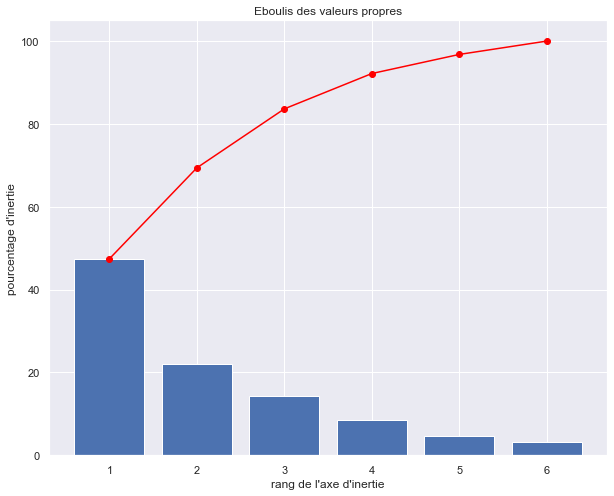

In [49]:
# Eboulis des valeurs propres
display_scree_plot(pca)

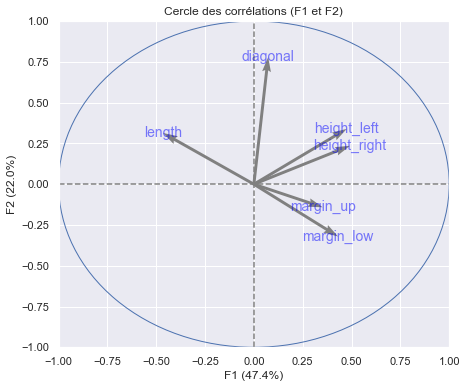

In [50]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))


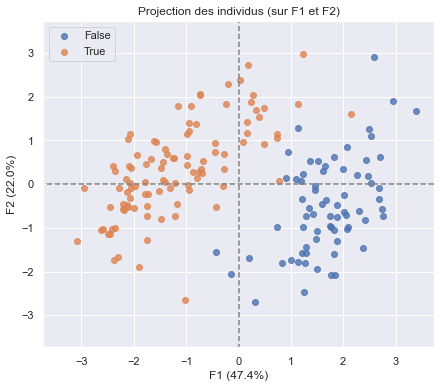

In [51]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = ensemble, alpha = 0.8)

In [52]:
# Les combinaisons linéaires 
# Contribution des individus sur les axes (qualité)
# analyser la qualité de représentation et la contribution des individus.

In [53]:
# Nombre de lignes
l = data1.shape[0]

#Nombre de colonnes
c = data1.shape[1]

In [54]:
#Variance expliquée
print(pca.explained_variance_)

[2.86372065 1.32522178 0.85912514 0.51460481 0.27840703 0.19442354]


In [55]:
#Variance expliquée corrigée
eigval= (l-1)/l*pca.explained_variance_
eigval

array([2.84687523, 1.31742636, 0.85407146, 0.51157773, 0.27676935,
       0.19327987])

In [56]:
#Variance expliquée corrigée 2
eigval2 = pca.singular_values_**2/l
eigval2

array([2.84687523, 1.31742636, 0.85407146, 0.51157773, 0.27676935,
       0.19327987])

In [57]:

#Proportion de variance expliquée
prop_var = pca.explained_variance_ratio_ * 100
np.around(prop_var, 1)

array([47.4, 22. , 14.2,  8.5,  4.6,  3.2])

In [58]:

#Racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#Corrélation des variables avec les axes
covar = np.zeros((c,c))
for k in range(c):
    covar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

mat_cor = pd.DataFrame(np.around(covar, 2),
                       index=features,
                       columns=['COR_'+str(i + 1) for i in range(c)])
mat_cor

,COR_1,COR_2,COR_3,COR_4,COR_5,COR_6
diagonal,0.12,0.89,-0.08,-0.40,-0.12,0.05
height_left,0.80,0.39,0.11,0.20,0.38,0.10
height_right,0.83,0.27,0.14,0.33,-0.26,-0.21
margin_low,0.73,-0.37,0.47,-0.16,-0.16,0.24
margin_up,0.59,-0.16,-0.76,0.10,-0.10,0.16
length,-0.79,0.36,0.12,0.41,-0.13,0.23


In [59]:
#Qualité de représentation des variables - cos2
cos2var = covar**2
    
qual_repr_var = pd.DataFrame(np.around(cos2var, 2),
                             index=features,
                             columns=['COS_2_' + str(i + 1) for i in range(c)])
qual_repr_var

,COS_2_1,COS_2_2,COS_2_3,COS_2_4,COS_2_5,COS_2_6
diagonal,0.02,0.80,0.01,0.16,0.01,0.00
height_left,0.64,0.15,0.01,0.04,0.14,0.01
height_right,0.69,0.07,0.02,0.11,0.07,0.04
margin_low,0.53,0.14,0.22,0.03,0.03,0.06
margin_up,0.35,0.03,0.58,0.01,0.01,0.02
length,0.62,0.13,0.01,0.17,0.02,0.05


In [60]:
#Contribution des variables aux axes
ctrvar = cos2var * 100
for j in range(c):
    ctrvar[:,j] = ctrvar[:,j]/eigval[j]

ctr_ax_var = pd.DataFrame(np.around(ctrvar,1),
                          index=features,
                          columns=['CTR_' + str(i + 1) for i in range(c)])

ctr_ax_var

,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5,CTR_6
diagonal,0.5,60.8,0.8,31.3,5.1,1.5
height_left,22.6,11.5,1.5,7.7,51.3,5.4
height_right,24.2,5.5,2.4,21.1,23.7,23.1
margin_low,18.6,10.3,26.3,5.1,9.7,30.0
margin_up,12.4,2.0,67.4,1.8,3.8,12.6
length,21.7,9.9,1.6,32.9,6.5,27.5


In [61]:
#Vérification
np.sum(ctr_ax_var, axis=0)

CTR_1    100.0
CTR_2    100.0
CTR_3    100.0
CTR_4     99.9
CTR_5    100.1
CTR_6    100.1
dtype: float64

## Analyse de la qualité de représentation des individus

In [62]:
#Contribution des individus dans l'inertie total
di = np.sum(X_scaled**2, axis=1)
ctr_tot = pd.DataFrame({'is_genuine':is_genuine, 'd_i': np.around(di, 2)})

#Individus avec le moins de contribution à l'inertie totale
ctr_tot.sort_values(by='d_i').head()

,is_genuine,d_i
64,True,0.81
98,True,0.88
85,True,1.43
76,True,1.44
59,True,1.48


In [63]:
#Qualité de représentation des individus
cos2 = X_projected**2
for j in range(p):
    cos2[:,j] = 100 * cos2[:,j]/di

qual_repr = pd.DataFrame(np.around(cos2, 1),
                         index=is_genuine,
                         columns=['COS2_' + str(i + 1) for i in range(p)])

qual_repr = qual_repr.reset_index()

qual_repr

,is_genuine,COS2_1,COS2_2,COS2_3,COS2_4,COS2_5,COS2_6
0,True,25.2,13.9,17.4,32.2,2.7,8.7
1,True,81.8,5.1,5.4,2.2,0.1,5.4
2,True,78.5,0.0,14.9,2.8,3.6,0.1
3,True,88.3,0.2,5.9,5.6,0.0,0.0
4,True,32.0,0.9,61.1,3.9,1.0,1.1
...,...,...,...,...,...,...,...
165,False,80.1,0.5,8.6,0.2,10.6,0.1
166,False,32.4,41.2,1.7,23.1,0.4,1.3
167,False,49.9,8.3,4.3,34.3,0.2,3.0
168,False,15.7,27.2,53.1,1.1,1.7,1.3


In [64]:
#Vérification
np.sum(cos2, axis=1)

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 10

In [65]:
#Les 5 billets avec la moins bonne qualité de représentation dans le 1er plan factoriel
qual_repr1 = qual_repr[['is_genuine', 'COS2_1', 'COS2_2']]
qual_repr2 = qual_repr1.copy()
qual_repr2['premier_plan'] = qual_repr2.sum(axis=1)
qual_repr2.sort_values(by='premier_plan').head(5)

,is_genuine,COS2_1,COS2_2,premier_plan
35,True,2.5,0.0,3.5
160,False,6.9,4.3,11.2
43,True,3.9,6.3,11.2
88,True,2.3,13.6,16.9
52,True,7.7,10.6,19.3


In [66]:
#Les 5 billets avec la meilleure qualité de représentation dans le 1er plan factoriel
qual_repr2.sort_values(by='premier_plan').tail()

,is_genuine,COS2_1,COS2_2,premier_plan
90,True,89.8,6.1,96.9
45,True,63.1,33.1,97.2
46,True,96.2,0.3,97.5
143,False,97.3,0.8,98.1
148,False,57.8,41.1,98.9


In [67]:
#Description de tous les billets
qual_repr2.describe()

,COS2_1,COS2_2,premier_plan
count,170.000000,170.000000,170.000000
mean,47.208824,21.497647,69.294706
std,27.836505,24.026676,21.350954
min,0.000000,0.000000,3.500000
25%,23.900000,2.925000,53.925000
50%,51.250000,12.550000,73.550000
75%,69.800000,36.475000,86.275000
max,97.300000,93.600000,98.900000


## Analyse de la contribution aux axes


In [68]:
#Contribution des individus aux axes
ctr = X_projected**2
for j in range(p):
    ctr[:,j] = 100 * ctr[:,j]/(n*eigval[j])

ctr_ax = pd.DataFrame(np.around(ctr, 2),
                     index=is_genuine,
                     columns=['CTR_' + str(i + 1) for i in range(p)])

ctr_ax = ctr_ax.reset_index()

ctr_ax.head()

,is_genuine,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5,CTR_6
0,True,0.96,1.14,2.20,6.81,1.04,4.89
1,True,0.92,0.12,0.20,0.14,0.01,0.90
2,True,0.80,0.00,0.51,0.16,0.38,0.02
3,True,0.88,0.00,0.19,0.31,0.00,0.00
4,True,1.19,0.08,7.59,0.81,0.38,0.60


In [69]:
#Vérification du calcul de la contribution aux axes
np.sum(ctr_ax,axis=0)

is_genuine    100.00
CTR_1         100.02
CTR_2         100.01
CTR_3         100.04
CTR_4         100.07
CTR_5         100.00
CTR_6         100.01
dtype: float64

In [70]:
#Les 5 billets avec la moins bonne contribution dans le 1er plan factoriel
ctr_ax1 = ctr_ax[['is_genuine', 'CTR_1', 'CTR_2']]
ctr_ax2 = ctr_ax1.copy()
ctr_ax2['premier_plan'] = ctr_ax2.sum(axis=1)
ctr_ax2.sort_values(by='premier_plan').head(5)

,is_genuine,CTR_1,CTR_2,premier_plan
102,False,0.17,0.01,0.18
118,False,0.25,0.01,0.26
114,False,0.30,0.00,0.30
128,False,0.31,0.02,0.33
150,False,0.30,0.05,0.35


In [71]:
#Les 5 billets avec la meilleure contribution dans le 1er plan factoriel
ctr_ax2.sort_values(by='premier_plan').tail()

,is_genuine,CTR_1,CTR_2,premier_plan
49,True,1.96,0.75,3.71
34,True,0.01,3.33,4.34
70,True,0.22,3.15,4.37
166,False,1.38,3.79,5.17
5,True,0.32,3.97,5.29


In [72]:
#Description de tous les billets
ctr_ax2.describe()

,CTR_1,CTR_2,premier_plan
count,170.000000,170.000000,170.000000
mean,0.588353,0.588294,1.764882
std,0.478928,0.781853,0.905102
min,0.000000,0.000000,0.180000
25%,0.192500,0.060000,1.175000
50%,0.470000,0.235000,1.630000
75%,0.890000,0.825000,2.127500
max,2.380000,3.970000,5.290000


# Mission 2
Appliquez un algorithme de classification, puis analysez le résultat obtenu.

Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la.

In [73]:
#Clustering par KMeans
km = KMeans(n_clusters=2)
km.fit(X_scaled)

clusterkm = km.labels_
clusterkm

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [74]:
#matrice de confusion
mat_conf = pd.crosstab(is_genuine, clusterkm, rownames=['is_genuine'], colnames=['Cluster'])
mat_conf

Cluster,0,1
is_genuine,,
False,1,69
True,93,7


In [75]:
#Création du dataframe d'appartenance des pays à chaque cluster
clusterk = pd.DataFrame({'is_genuine':is_genuine, 'Cluster':clusterkm})

vrais_posk = mat_conf.iloc[1].max()
vrais_negk = mat_conf.iloc[0].max()
faux_posk = mat_conf.iloc[0].min()
faux_negk = mat_conf.iloc[1].min()
vrais_posk, vrais_negk, faux_posk, faux_negk

(93, 69, 1, 7)

In [76]:
#Sensibilité de la classification
sensk = vrais_posk / (vrais_posk + faux_negk)
sensk


0.93

In [77]:
#Spécificité de la classification
speck = vrais_negk / (faux_posk + vrais_negk)
speck

0.9857142857142858

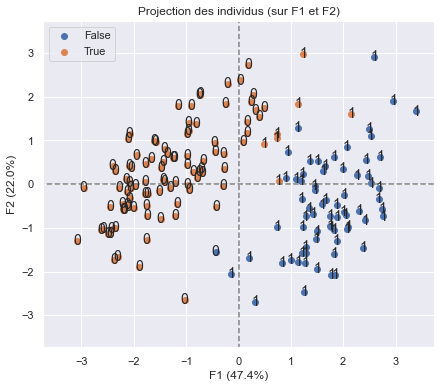

In [78]:
#Projection des individus
display_factorial_planes(X_projected,
                         n_comp,
                         pca,
                         [(0,1)],
                         labels=clusterkm,
                         alpha=1,
                         illustrative_var=is_genuine)

plt.show()

# Mission 3: Régression logistique

In [79]:
data_reg = data[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

In [80]:
# Variables explicatives
x = data_reg
# variables à expliquer
y = data.is_genuine

In [81]:
import sklearn
from sklearn import preprocessing, decomposition, metrics
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
print(sklearn.__version__)

0.24.1


In [82]:
# Partition du jeu de données
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [83]:
# Régression logistique
reg_log = LogisticRegression(solver='liblinear')
reg_log.fit(x_train, y_train)

# Sauvegarde de prédictions
y_pred = reg_log.predict(x_test)
y_pred

array([ True, False, False, False, False, False,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False, False, False,  True,  True, False,  True])

In [84]:
matr_conf = metrics.confusion_matrix(y_test, y_pred)
matr_conf = pd.DataFrame(matr_conf)
matr_conf

,0,1
0,16,0
1,0,27


In [85]:
# colonnes => prediction
# lignes => realité
# Composition de la matrice de confusion
true_pos_rl = matr_conf[1][1]
false_neg_rl = matr_conf[0][1]
true_neg_rl = matr_conf[0][0]
false_pos_rl = matr_conf[1][0]
true_pos_rl, true_neg_rl, false_pos_rl, false_neg_rl

(27, 16, 0, 0)

### Taux de succès : probabilité de bon classement du modèle

### Sensibilité : capacité du modèle à retrouver les positifs

### Précision : proportion de vrais positifs parmi les individus classés positifs

### Spécificité : proportion de négatifs détectés

In [86]:
# Taux de succès : probabilité de bon classement du modèle
print('Taux de succès:',metrics.accuracy_score(y_test, y_pred))

#Précision : proportion de vrais positifs parmi les individus classés positifs
print("Précision:",metrics.precision_score(y_test, y_pred))

#Sensibilité : capacité du modèle à retrouver les positifs
print("Rappel ou Sensibilité:",metrics.recall_score(y_test, y_pred))

Taux de succès: 1.0
Précision: 1.0
Rappel ou Sensibilité: 1.0


In [87]:
print("Spécificité:",true_neg_rl/(true_neg_rl + false_pos_rl))


Spécificité: 1.0


In [88]:
y_pred_train = reg_log.predict(x_train)
y_pred_train

array([False,  True, False,  True,  True,  True, False,  True, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False, False,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
        True, False,  True,  True, False, False,  True, False,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True, False,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True, False,  True, False, False,  True, False,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
        True,  True, False, False,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True])

In [89]:
print('Accuracy:',metrics.accuracy_score(y_train, y_pred_train))

print("Precision:",metrics.precision_score(y_train, y_pred_train))

print("Recall:",metrics.recall_score(y_train, y_pred_train))

Accuracy: 0.984251968503937
Precision: 0.9863013698630136
Recall: 0.9863013698630136


In [90]:
y_pred_proba = reg_log.predict_proba(x_test)
y_pred_proba

array([[0.00315604, 0.99684396],
       [0.82392927, 0.17607073],
       [0.99574067, 0.00425933],
       [0.98745515, 0.01254485],
       [0.65304287, 0.34695713],
       [0.97107029, 0.02892971],
       [0.00922972, 0.99077028],
       [0.16624948, 0.83375052],
       [0.01870465, 0.98129535],
       [0.98427049, 0.01572951],
       [0.00812642, 0.99187358],
       [0.05109495, 0.94890505],
       [0.01839766, 0.98160234],
       [0.99164219, 0.00835781],
       [0.09040547, 0.90959453],
       [0.22517603, 0.77482397],
       [0.00315612, 0.99684388],
       [0.97073613, 0.02926387],
       [0.9884733 , 0.0115267 ],
       [0.00757768, 0.99242232],
       [0.01049406, 0.98950594],
       [0.0023195 , 0.9976805 ],
       [0.96909285, 0.03090715],
       [0.01667704, 0.98332296],
       [0.00869748, 0.99130252],
       [0.33036896, 0.66963104],
       [0.01185524, 0.98814476],
       [0.03476491, 0.96523509],
       [0.93251526, 0.06748474],
       [0.02898205, 0.97101795],
       [0.

In [91]:
# Exemple d'application du modèle de prédiction

In [92]:
example = pd.read_csv("example.csv")
example

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [93]:
id_billets = data.columns.drop('is_genuine')
x_example = example[id_billets].values

y_predict_example = reg_log.predict(x_example)

In [94]:
#Ajout du resultat
example['is_genuine'] = y_predict_example

In [95]:
#Calcul des probas d'affectaion sur l'ech. à prédire
probas = reg_log.predict_proba(x_example)

example['Probas_faux'] = probas[:,0]
example['Probas_vrais'] = probas[:,1]
example

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine,Probas_faux,Probas_vrais
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,0.950820,0.049180
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,0.987514,0.012486
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.970393,0.029607
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,0.152112,0.847888
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,0.005500,0.994500


In [96]:
#Restriction sur vrais et les faux billets
vrais_billets = example[example['is_genuine'] == True]
faux_billets = example[example['is_genuine'] == False]

In [97]:
example.to_csv('example.csv')

In [98]:
#Impression des identifiants des vrais billets et de leurs probalités
a1 = ['Le billet ' + str(vrais_billets.iloc[i,6]) +
      ' serait un vrai car il a une probabilité de ' +
      str(vrais_billets.iloc[i,9]) for i in range(vrais_billets.shape[0])]
for j in range(vrais_billets.shape[0]):
    print(a1[j])

Le billet A_4 serait un vrai car il a une probabilité de 0.8478877396197101
Le billet A_5 serait un vrai car il a une probabilité de 0.9944995136646727


In [99]:
#Impression des identifiants des vrais billets et de leurs probalités
a1 = ['Le billet ' + str(faux_billets.iloc[i,6]) +
      ' serait un faux car il a une probabilité de ' +
      str(faux_billets.iloc[i,8]) for i in range(faux_billets.shape[0])]
for j in range(faux_billets.shape[0]):
    print(a1[j])

Le billet A_1 serait un faux car il a une probabilité de 0.9508196577169126
Le billet A_2 serait un faux car il a une probabilité de 0.9875135012571065
Le billet A_3 serait un faux car il a une probabilité de 0.9703930548548136
